# Reviewing Classification Problems

**GOALS**:
- Identify big idea with `LogisticRegression`
- Evaluate performance in terms of Accuracy, Precision, and Recall


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, classification_report
from sklearn.pipeline import make_pipeline
from sklearn.datasets import load_breast_cancer

In [2]:
cancer = load_breast_cancer()

In [3]:
df = pd.DataFrame(cancer.data, columns= cancer.feature_names)

In [4]:
df['target'] = cancer.target

In [5]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [7]:
X = df[['mean radius', 'mean fractal dimension']]
X_train, X_test, y_train, y_test = train_test_split(X, cancer.target)
clf = LogisticRegression()

In [8]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [10]:
pred = clf.predict(X_test)
print(classification_report(pred, y_test))

             precision    recall  f1-score   support

          0       0.71      0.92      0.80        38
          1       0.97      0.87      0.91       105

avg / total       0.90      0.88      0.89       143



__MT Note__ - the task drives the thing that we care about. Recall v. precision. 

In [11]:
%%bash
pip install mglearn

  Running setup.py bdist_wheel for mglearn: started
  Running setup.py bdist_wheel for mglearn: finished with status 'done'
  Stored in directory: /Users/megan/Library/Caches/pip/wheels/3b/81/34/a54d61d5d108dfcb016bcd8f4f7d8cc0538994f07704714b8d
Successfully built mglearn


distributed 1.21.8 requires msgpack, which is not installed.


__MT Note__ %%bash is a magic command that essentially turns any cell into a terminal (unix). then you can load in a new library or whatever into your probram. You can also use this %%bash to make your cell read R or HTML or something like that.

In [13]:
import mglearn

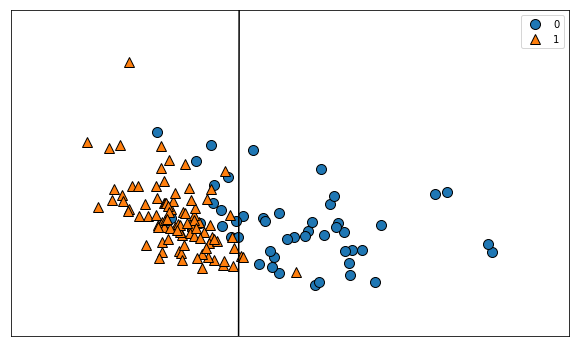

In [14]:
#X, y = mglearn.datasets.make_forge()
clf = clf.fit(X_train, y_train)
plt.figure(figsize = (10, 6))
mglearn.plots.plot_2d_separator(clf, np.array(X_test))
mglearn.discrete_scatter(X_test['mean fracta'], X_test['mean '], y_test)
plt.ylim(min(X_test['mean fractal dimension'])-.01, max(X_test['mean fractal dimension'])+.01)
plt.legend()

In [12]:
print(classification_report(clf.predict(X_test), y_test))

             precision    recall  f1-score   support

          0       0.73      0.94      0.82        47
          1       0.96      0.83      0.89        96

avg / total       0.89      0.87      0.87       143



__MT NOTE__ 

precision: the blue on the right are things that are classified as zeros that are zeros. The false positives are the things that are classified as zeros that are not (the triangles on the right side of the line)

recall: recall/accuracy = true positives + true negatives / TP+FP+TN+FN. 

__improving recall means less false negatives__


In [16]:
from sklearn.metrics import confusion_matrix

In [17]:
confusion_matrix(clf.predict(X_test), y_test)

array([[35,  3],
       [14, 91]])

__MT NOTE__ confusion matrix identifies the things in each of those categories. 

### Problem

Using two other pairs of inputs, see if you can improve upon the recall score for the 1 category.  Plot the decision boundary and classes as demonstrated above.  Pay close attention to identifying the points that are contributing to differences in precision and recall.

In [29]:
X = df[['mean concavity', 'mean symmetry']]
X_train, X_test, y_train, y_test = train_test_split(X, cancer.target)
clf = LogisticRegression()

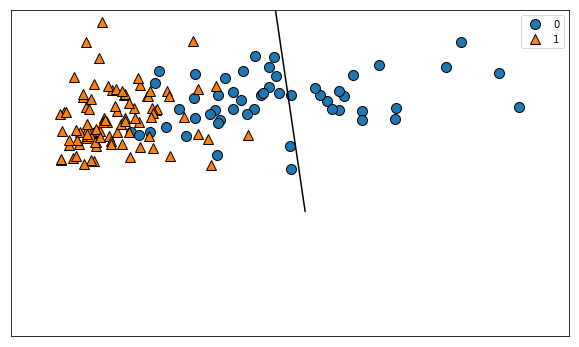

In [30]:
#X, y = mglearn.datasets.make_forge()
clf = clf.fit(X_train, y_train)
plt.figure(figsize = (10, 6))
mglearn.plots.plot_2d_separator(clf, np.array(X_test))
mglearn.discrete_scatter(X_test['mean concavity'], X_test['mean symmetry'], y_test)
plt.ylim(min(X_test['mean concavity'])-.01, max(X_test['mean symmetry'])+.01)
plt.legend()

__MT NOTE__ this line (mglearn.plots.plot_2d_separator(clf, np.array(X_test)) is what is giving the line in this. 

In [31]:
print(classification_report(clf.predict(X_test), y_test))

             precision    recall  f1-score   support

          0       0.34      1.00      0.51        18
          1       1.00      0.72      0.84       125

avg / total       0.92      0.76      0.80       143



__MT NOTE__ lass0 is a regularization method for limiting unnecessary features (it regularizes, takes things down to zero)

### Problem

Using the PIMA diabetes dataset, your goal is to build a classifier that is:

1. Accurate
2. Appropriate

For information about the data, please see the brief description of the variables here: https://www.kaggle.com/uciml/pima-indians-diabetes-database/home 

Your results should include a clear framing of the question, brief description of the approach you used, and suggestions as to what else might be done to effect a better model.

In [33]:
pima = pd.read_csv('data/pima_diabetes.csv', index_col=0)

In [34]:
pima.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [40]:
x = pima.mass
y = pima('class')

TypeError: 'DataFrame' object is not callable

In [37]:
X = df[['preg', 'mass']]
X_train, X_test, y_train, y_test = train_test_split(X, cancer.target)
clf = LogisticRegression()

KeyError: "['preg' 'mass'] not in index"

In [41]:
accuracy_score()

TypeError: accuracy_score() missing 2 required positional arguments: 'y_true' and 'y_pred'

In [ ]:
clf.fit(X_train, y_train)

In [ ]:
pred = clf.predict(X_test)
print(classification_report(pred, y_test))